Dataset link: https://github.com/vikaschauhan734/fake_news_classifier/blob/main/news.csv

### Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vikas
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Vikas
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Importing CSV file

In [4]:
df = pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Shape of Dataset

In [5]:
df.shape

(6335, 4)

### Dropping 'Unnamed: 0' and 'title' column

In [6]:
df = df[["text","label"]]
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


### Mapping FAKE with 0 and REAL with 1 in 'label' column

In [7]:
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [8]:
df['label'] = df['label'].map({"FAKE":0, "REAL":1})
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


### Text Preprocessing

In [9]:
df['text'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df.head()

,text,label
0,Daniel Greenfield a Shillman Journalism Fello...,0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U S Secretary of State John F Kerry said Mon...,1
3,Kaydee King KaydeeKing November T...,0
4,It s primary day in New York and front runners...,1


In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [11]:
for i in range(df.shape[0]):
  # Lowering the text
  text = df.iloc[i,0].lower()
  # Splitting our text into words
  text = text.split()
  # Removing stop words
  text = [word for word in text if word not in set(stopwords.words("english"))]
  # Lemmatization
  text = [lemmatizer.lemmatize(word) for word in text]
  # Combine all words into sentence
  text = " ".join(text)
  df.iloc[i,0] = text

In [12]:
df.head()

,text,label
0,daniel greenfield shillman journalism fellow f...,0
1,google pinterest digg linkedin reddit stumbleu...,0
2,u secretary state john f kerry said monday sto...,1
3,kaydee king kaydeeking november lesson tonight...,0
4,primary day new york front runner hillary clin...,1


### Converting Words into Vectors

#### 1. Bag of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(ngram_range=(2,3))

X = bow.fit_transform(df['text'])

#### 2. TfIdf Vectorizer

In [137]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(ngram_range=(3,3))

# X = tfidf.fit_transform(df['text'])

We are getting maximum score using Count Vectorizer with hyper tuning as ngram_range = (2,3)

In [14]:
X.shape

(6335, 3835704)

### Dependent Variable

In [15]:
y = df['label']
y.value_counts()

label
1    3171
0    3164
Name: count, dtype: int64

### Splitting our data into training and testing set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

### Training our model

#### 1. Multinomial Naive Bayes Algorithm

In [17]:
from sklearn.naive_bayes import MultinomialNB

multinomial = MultinomialNB()

multinomial.fit(X_train, y_train)

MultinomialNB()

#### Accuracy Score

In [18]:
multinomial.score(X_test, y_test)

0.9273875295974744

#### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

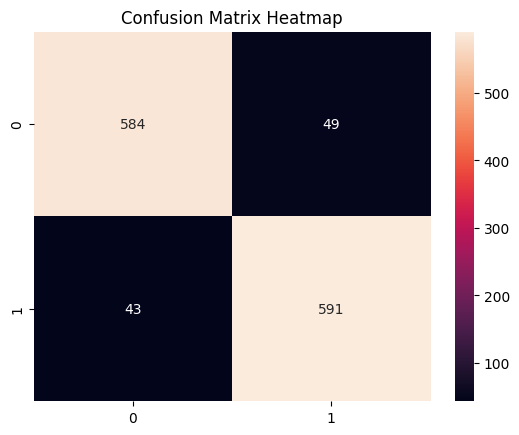

In [20]:
y_pred = multinomial.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       633
           1       0.92      0.93      0.93       634

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



#### 2. Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

reg = LogisticRegressionCV()

reg.fit(X_train, y_train)

#### Accuracy Score

In [148]:
reg.score(X_test, y_test)

0.9218626677190213

#### Confusion Matrix

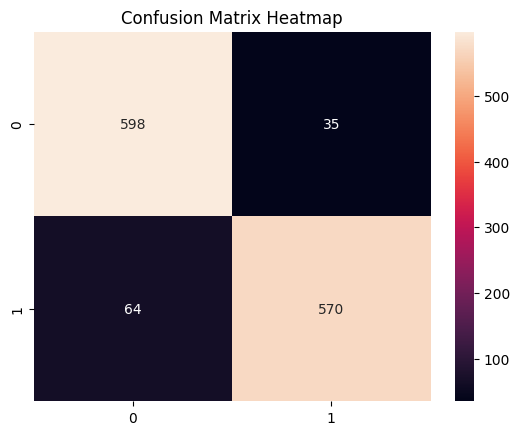

In [149]:
y_pred = reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       633
           1       0.94      0.90      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



f1-score for 0 and 1 is 0.92

#### 3. Random Forest Classifier Algorithm

In [151]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

#### Accuracy Score

In [152]:
forest.score(X_test, y_test)

0.8942383583267561

#### Confusion Matrix

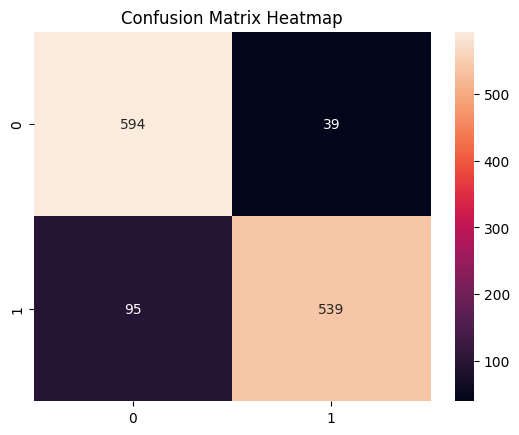

In [153]:
y_pred = forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       633
           1       0.93      0.85      0.89       634

    accuracy                           0.89      1267
   macro avg       0.90      0.89      0.89      1267
weighted avg       0.90      0.89      0.89      1267



f1-score for 0 is 0.90 and for 1 it is 0.89

#### 4. SVC Algorithm

In [155]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

#### Accuracy Score

In [156]:
svc.score(X_test, y_test)

0.8255722178374112

#### Confusion Matrix

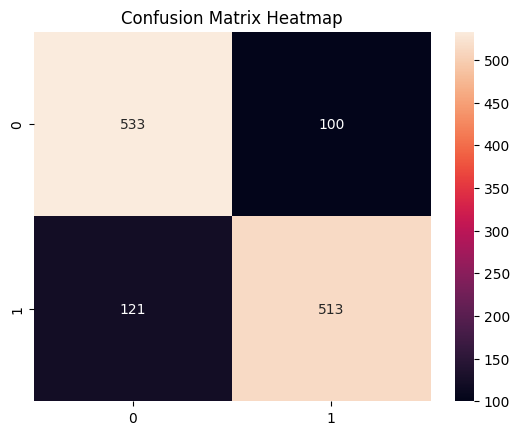

In [157]:
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       633
           1       0.84      0.81      0.82       634

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



f1-score for 0 is 0.83 and for 1 is 0.82

#### 5. Gradient Boosting Algorithm

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()

grad.fit(X_train, y_train)

GradientBoostingClassifier()

#### Accuracy Score

In [160]:
grad.score(X_test, y_test)

0.8571428571428571

#### Confusion Matrix

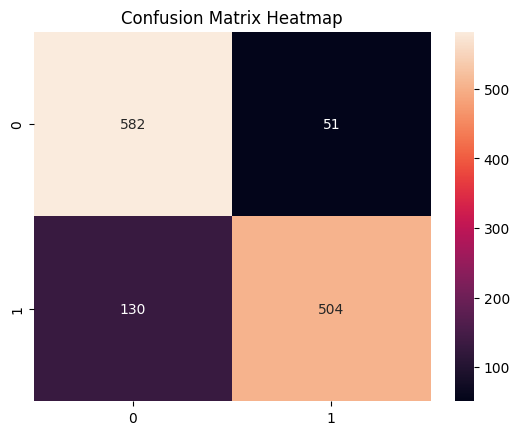

In [161]:
y_pred = grad.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       633
           1       0.91      0.79      0.85       634

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267



f1-score for 0 is 0.87 and for 1 is 0.85

### Saving our model

In [22]:
import pickle

with open('model.pkl', 'wb') as f:
  pickle.dump(multinomial, f)

In [23]:
with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(bow, f)